In [ ]:
# Instalación de las librerias o dependencias necesarias
!pip install beautifulsoup4 requests pandas

In [333]:
# Load dependencies
import json # modulo para trabajar con archivos JSON
import requests # libreria para hacer peticiones HTTP
import pandas as pd # libreria para procesar datos, proporciona funciones para analíticas
from bs4 import BeautifulSoup as bs # Extraer información de paginas web

In [334]:
# Función que convierte una lista de elementos en un dataframe de pandas
def rowsToDataFrame(rows):
    df = pd.DataFrame(rows[1:], columns=rows[0])
    return df

In [335]:
# Función para extraer los datos de una tabla HTML
def processTableData(tbl):
    rows = []
    for child in tbl.find('tbody').children: # itera los items internos de la tabla [<tr>]
        row = []
        for td in child: # itera los items internos de la tabla [<td>]
            try:
                item = td.text.replace('\n', '') # recupera el texto del elemento [<td>]
                if item:
                    row.append(item) # Agrega cada elemento de la fila
            except:
                continue
        if len(row) > 0:
            rows.append(row) # agrega todos los campos de una fila de la tabla
    # print(rows)
    return rows

In [336]:
# Función para exxtrar la data de la URL y procesar el contenido HTML
def processDataHTML(data):
    soup = bs(data['sections'][0]['text'], 'html.parser') # Recupera el item del JSON y lo convierte en contenido HTML
    tbl = soup.find_all('table')[1] # Recupera la tabla del contenido HTML
    # print(tbl.prettify())
    tblRows = processTableData(tbl) # Ejecuta la función apra porcesar el contenido de la Tabla
    return tblRows

In [337]:
# Read website
# r = requests.get('https://www.wikiwand.com/es/Anexo:Tabla_estadística_de_la_Copa_Mundial_de_Fútbol')
r = requests.get('https://www.wikiwand.com/mcs-api/es.wikipedia.org/v1/page/mobile-sections-remaining/Anexo%3APa%C3%ADses_por_tasa_de_suicidio')  # Recuperamos el contenido de la web
# print(r)
table = processDataHTML(json.loads(r.content)) # Formate el contenido en formato JSON
df = rowsToDataFrame(table) # ejecuta la funcion para recupera los datos de la tabla como dataframe de Pandas
df

,N.º,País[1][2],Año,Hombres,Mujeres,Promedio
0,1,Groenlandia[3][4],2020,"112,9","163,0",138
1,2,Rusia,2004,"61,6","10,7","34,3"
2,3,Lituania[5],2012,"54,7","10,8","31,0"
3,4,Kazajistán,2003,"51,0","8,9","29,2"
4,5,Eslovenia,2003,"45,0","12,0","28,1"
...,...,...,...,...,...,...
95,96,Jamaica,1985,"0,5","0,2","0,3"
96,97,Siria,1985,"0,2","0,0","0,1"
97,98,Egipto,2009,"0,1","0,0","0,1"
98,99,Antigua y Barbuda,1995,"0,0","0,0","0,0"


In [338]:
# Inspeccionamos el tipo de dato de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   N.º         100 non-null    object
 1   País[1][2]  100 non-null    object
 2   Año         100 non-null    object
 3   Hombres     100 non-null    object
 4   Mujeres     100 non-null    object
 5   Promedio    100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [339]:
# Guardamos las datos extraidos como archivo CSV
# se puede aplcair otras opciones para guardar (Base de datos)
df.to_csv('tasasuicidio.csv')

In [ ]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

In [342]:
# Ubicacion del archivo de datos
url = 'tasasuicidio.csv' # external url?

In [343]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,N.º,País[1][2],Año,Hombres,Mujeres,Promedio
0,0,1,Groenlandia[3][4],2020,"112,9","163,0",138
1,1,2,Rusia,2004,"61,6","10,7","34,3"
2,2,3,Lituania[5],2012,"54,7","10,8","31,0"
3,3,4,Kazajistán,2003,"51,0","8,9","29,2"
4,4,5,Eslovenia,2003,"45,0","12,0","28,1"


In [344]:
# Visualizamos el DataFrame
data

,Unnamed: 0,N.º,País[1][2],Año,Hombres,Mujeres,Promedio
0,0,1,Groenlandia[3][4],2020,"112,9","163,0",138
1,1,2,Rusia,2004,"61,6","10,7","34,3"
2,2,3,Lituania[5],2012,"54,7","10,8","31,0"
3,3,4,Kazajistán,2003,"51,0","8,9","29,2"
4,4,5,Eslovenia,2003,"45,0","12,0","28,1"
...,...,...,...,...,...,...,...
95,95,96,Jamaica,1985,"0,5","0,2","0,3"
96,96,97,Siria,1985,"0,2","0,0","0,1"
97,97,98,Egipto,2009,"0,1","0,0","0,1"
98,98,99,Antigua y Barbuda,1995,"0,0","0,0","0,0"


In [345]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
data = data.drop(data.columns[[0]],axis = 1)
data

,N.º,País[1][2],Año,Hombres,Mujeres,Promedio
0,1,Groenlandia[3][4],2020,"112,9","163,0",138
1,2,Rusia,2004,"61,6","10,7","34,3"
2,3,Lituania[5],2012,"54,7","10,8","31,0"
3,4,Kazajistán,2003,"51,0","8,9","29,2"
4,5,Eslovenia,2003,"45,0","12,0","28,1"
...,...,...,...,...,...,...
95,96,Jamaica,1985,"0,5","0,2","0,3"
96,97,Siria,1985,"0,2","0,0","0,1"
97,98,Egipto,2009,"0,1","0,0","0,1"
98,99,Antigua y Barbuda,1995,"0,0","0,0","0,0"


In [346]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   N.º         100 non-null    int64 
 1   País[1][2]  100 non-null    object
 2   Año         100 non-null    int64 
 3   Hombres     100 non-null    object
 4   Mujeres     100 non-null    object
 5   Promedio    100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [347]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,N.º,Año
count,100.000000,100.00000
mean,50.500000,2003.95000
std,29.011492,6.81409
min,1.000000,1985.00000
25%,25.750000,2001.00000
50%,50.500000,2004.00000
75%,75.250000,2009.00000
max,100.000000,2022.00000


In [348]:
# Fix no value in Titulos col
def fixTitulos(val):
    return 0 if val == '-' else int(val)

In [349]:
def fixRend(val):
    if (val == '%'):
        return float(val.replace(',', '.').replace('%', ''))
    return val

data['Hombres'] = data['Hombres'].str.replace('ND', '0')
data['Hombres'] = data['Hombres'].str.replace(',', '.')
data['Hombres'] = data['Hombres'].astype(float)
data['Mujeres'] = data['Mujeres'].str.replace('ND', '0')
data['Mujeres'] = data['Mujeres'].str.replace(',', '.')
data['Mujeres'] = data['Mujeres'].astype(float)
data['Promedio'] = data['Promedio'].str.replace(',', '.')
data['Promedio'] = data['Promedio'].astype(float)

#data['Relación hombre-mujer'] = data['Relación hombre-mujer'].str.replace(',', '.')
#data['Tasa bruta'] = data['Tasa bruta'].str.replace(',', '.')
#data['Tasa estandarizada por edad'] = data['Tasa estandarizada por edad'].str.replace(',', '.')
#data['Tasa bruta masculina'] = data['Tasa bruta masculina'].str.replace(',', '.')
#data['Tasa femenina cruda'] = data['Tasa femenina cruda'].str.replace(',', '.')
#data['Relación hombre-mujer'] = data['Relación hombre-mujer'].astype(float)
#data['Tasa bruta'] = data['Tasa bruta'].astype(float)
#data['Tasa estandarizada por edad'] = data['Tasa estandarizada por edad'].astype(float)
#data['Tasa bruta masculina'] = data['Tasa bruta masculina'].astype(float)
#data['Tasa femenina cruda'] = data['Tasa femenina cruda'].astype(float)


In [350]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N.º         100 non-null    int64  
 1   País[1][2]  100 non-null    object 
 2   Año         100 non-null    int64  
 3   Hombres     100 non-null    float64
 4   Mujeres     100 non-null    float64
 5   Promedio    100 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 4.8+ KB


In [351]:
data[['País[1][2]','Año','Hombres','Mujeres','Promedio']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)
data = data.drop(data.iloc[:,0:1].columns,axis=1)
print(data)

                                       País[1][2]   Año  Hombres  Mujeres  \
0                               Groenlandia[3][4]  2020    112.9    163.0   
1                                           Rusia  2004     61.6     10.7   
2                                     Lituania[5]  2012     54.7     10.8   
3                                      Kazajistán  2003     51.0      8.9   
4                                       Eslovenia  2003     45.0     12.0   
..                                            ...   ...      ...      ...   
95                                        Jamaica  1985      0.5      0.2   
96                                          Siria  1985      0.2      0.0   
97                                         Egipto  2009      0.1      0.0   
98                              Antigua y Barbuda  1995      0.0      0.0   
99  San Cristóbal y Nieves San Cristóbal y Nieves  1995      0.0      0.0   

    Promedio  
0      138.0  
1       34.3  
2       31.0  
3       29.2  


<ipython-input-351-48df74efa3ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['País[1][2]','Año','Hombres','Mujeres','Promedio']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-351-48df74efa3ad>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['País[1][2]','Año','Hombres','Mujeres','Promedio']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


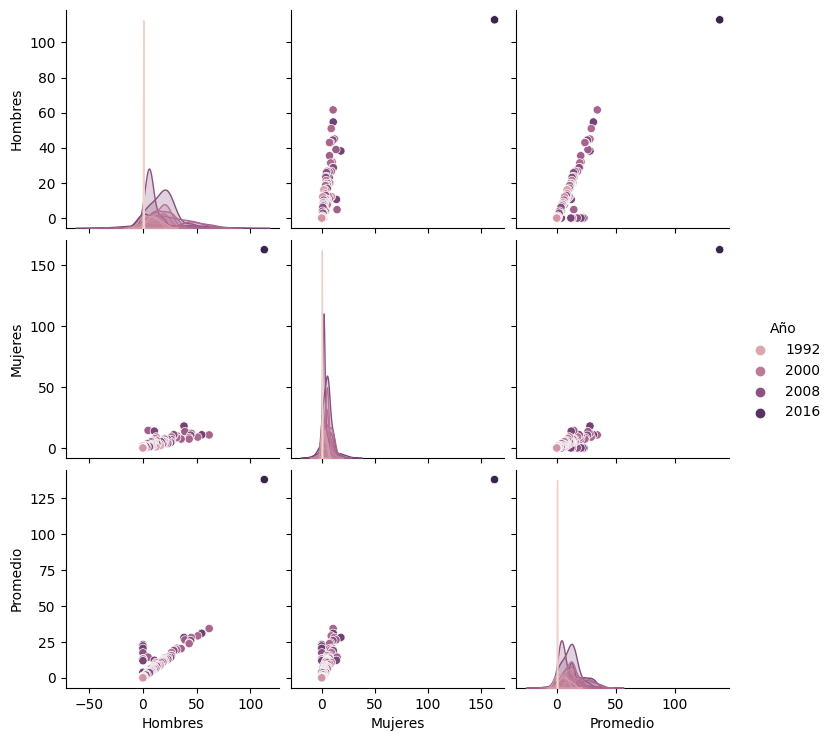

In [352]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data,hue="Año")

In [353]:
# Seleccción de variables significativas
sel_data = data[['Año', 'Hombres','Mujeres', 'Promedio']]
sel_data

,Año,Hombres,Mujeres,Promedio
0,2020,112.9,163.0,138.0
1,2004,61.6,10.7,34.3
2,2012,54.7,10.8,31.0
3,2003,51.0,8.9,29.2
4,2003,45.0,12.0,28.1
...,...,...,...,...
95,1985,0.5,0.2,0.3
96,1985,0.2,0.0,0.1
97,2009,0.1,0.0,0.1
98,1995,0.0,0.0,0.0


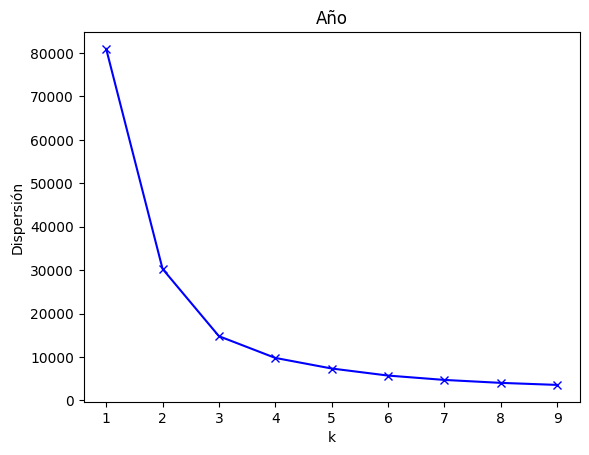

In [354]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Año')